#Cat - Dog Dataset

In [13]:
from google.colab import files
x=files.upload()


Saving kagglecatsanddogs_5340.zip to kagglecatsanddogs_5340.zip


In [30]:
#Check that the file exists
! ls-hl

/bin/bash: ls-hl: command not found


In [16]:
! unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

#Image Processing


In [41]:
import PIL
print("Pillow Version: ", PIL.__version__)

Pillow Version:  7.1.2


In [57]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# load and Show Image

In [85]:
from PIL import Image
#Load Image
image = Image.open('PetImages/Cat/10050.jpg')
print(image.format)
print(image.size)
print(image.mode)

JPEG
(450, 470)
RGB


(470, 450, 3)


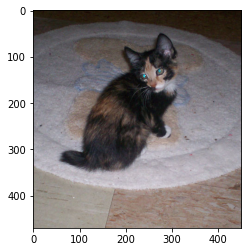

In [86]:
#Load a SINGLE IMAGE
print(np.asarray(image).shape)
plt.imshow(np.asarray(image))

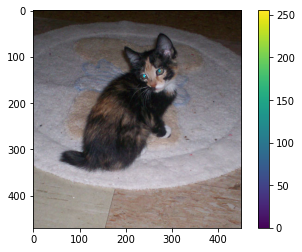

In [87]:
plt.imshow(np.asarray(image))
plt.colorbar()

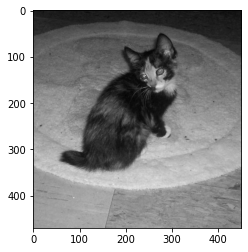

In [88]:
#Convert to Grayscale
gs_image =image.convert(mode='L')
plt.imshow(np.asarray(gs_image), cmap = 'gray')


(200, 200)


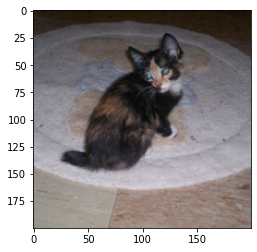

In [92]:
#Resize image 
image_resized= image.resize ((200, 200))
print(image_resized.size)
plt.imshow(np.asarray(image_resized))

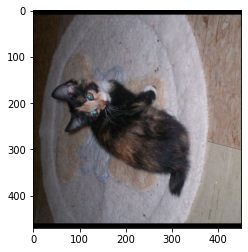

In [95]:
# FLIP AND ROTATE AN IMAGE
plt.imshow(image.rotate(90))


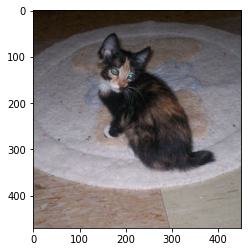

In [101]:
plt.imshow(image.transpose(Image.FLIP_LEFT_RIGHT))

In [109]:
#Building your Own Image Generator using IMAGEDATAGENERATOR
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
#Rescale all images
my_generator = ImageDataGenerator(rescale=1./255)


In [119]:
#Specify how Image Generator will read and deliver
my_image_generator= my_generator.flow_from_directory('./PetImages/', target_size=(250,250), batch_size= 20, class_mode='binary')

Found 25000 images belonging to 2 classes.


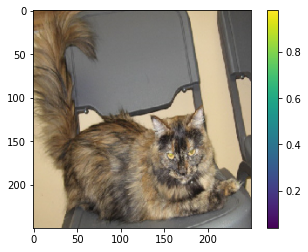

0.0


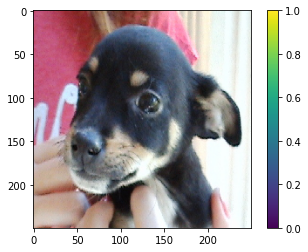

1.0


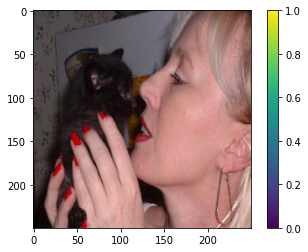

0.0


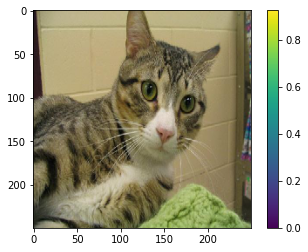

0.0


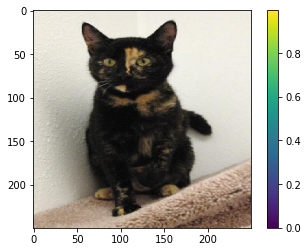

0.0


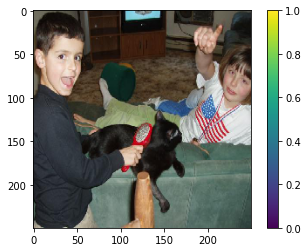

0.0


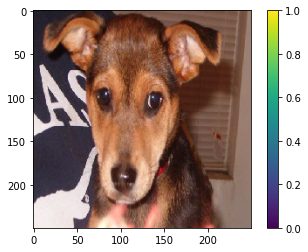

1.0


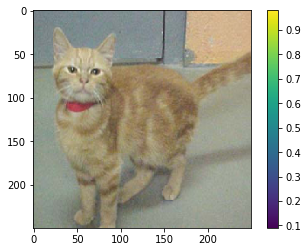

0.0


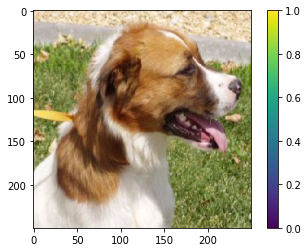

1.0


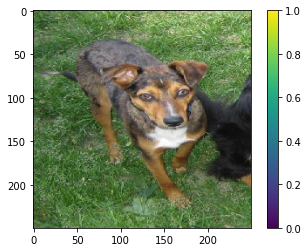

1.0


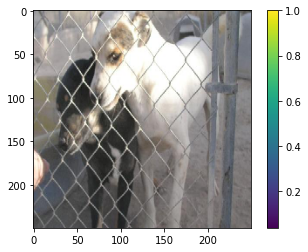

1.0


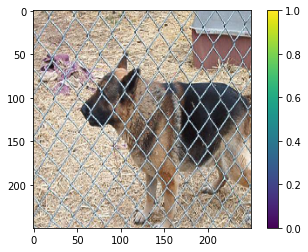

1.0


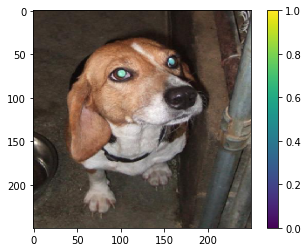

1.0


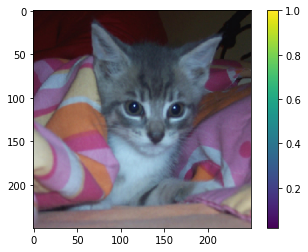

0.0


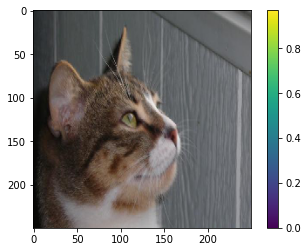

0.0


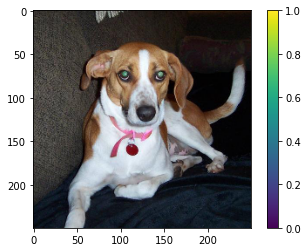

1.0


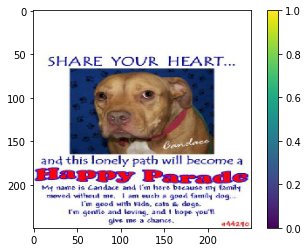

1.0


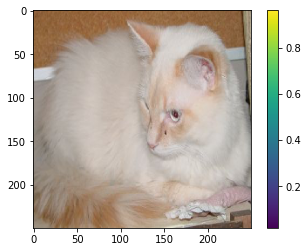

0.0


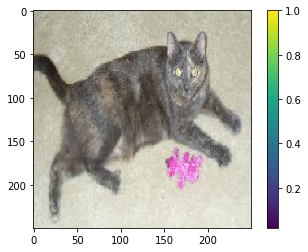

0.0


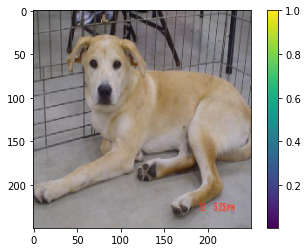

1.0


In [121]:
for my_batch in my_image_generator:
  images=my_batch[0]
  labels=my_batch[1]
  for i in range (len(labels)):
    # Give indiviual images and their corresponding labels
    plt.imshow(images[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
  break


In [122]:
# Augmenting Images using Image Data generator
my_augmented_generator = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest'
)

In [128]:
my_augmented_image_generator=my_augmented_generator.flow_from_directory('./PetImages/', target_size=(250,250), batch_size= 20, class_mode='binary')

Found 25000 images belonging to 2 classes.


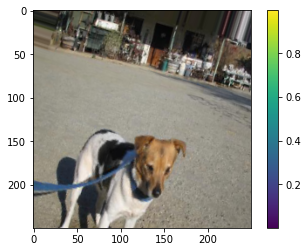

1.0


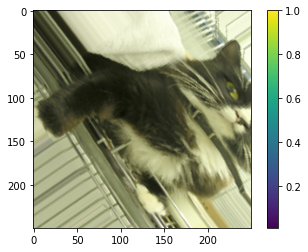

0.0


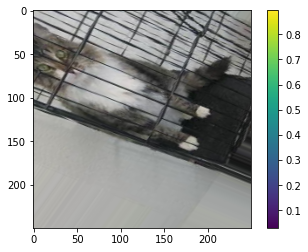

0.0


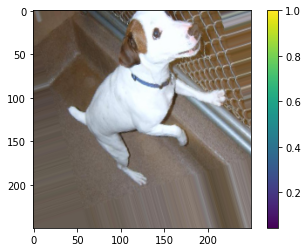

1.0


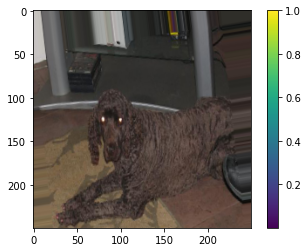

1.0


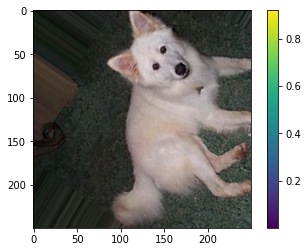

1.0


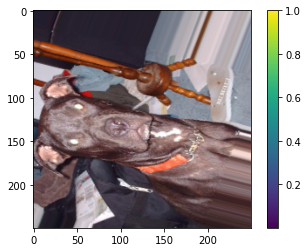

1.0


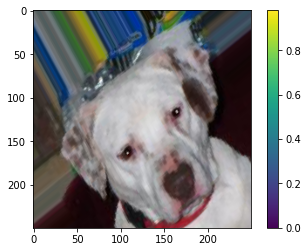

1.0


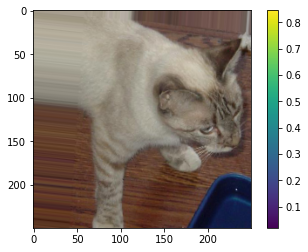

0.0


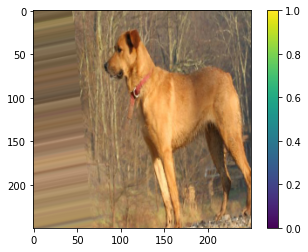

1.0


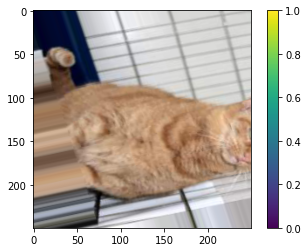

0.0


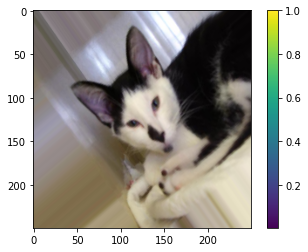

0.0


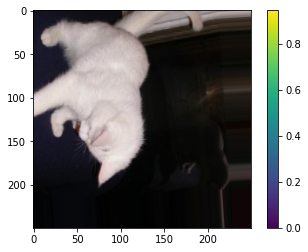

0.0


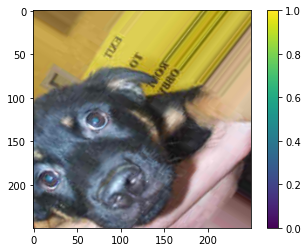

1.0


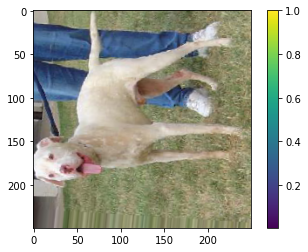

1.0


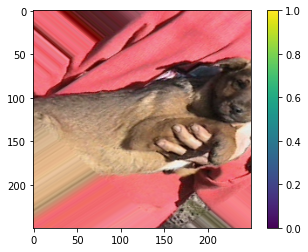

1.0


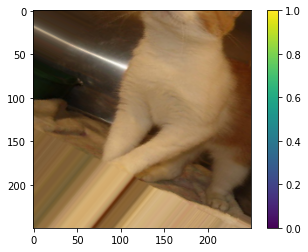

0.0


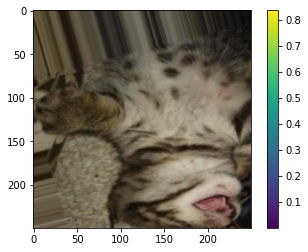

0.0


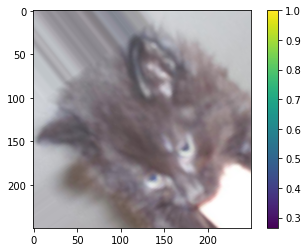

0.0


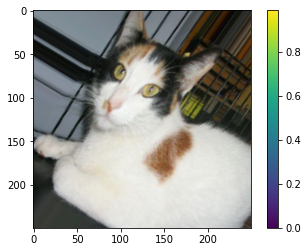

0.0


In [129]:
for my_batch in my_augmented_image_generator:
  images=my_batch[0]
  labels=my_batch[1]
  for i in range (len(labels)):
    # Give indiviual images and their corresponding labels
    plt.imshow(images[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
  break